In [98]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter('ignore')
plt.style.use('dark_background')
from sklearn.metrics import mean_squared_error as mse

In [99]:
data = pd.read_csv('/content/drive/MyDrive/Notebooks/module 5 linear Regression/3. gradient descent/Transformed_Housing_Data2.csv')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,26,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,47.7379,-122.233,2720.0,8062,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [100]:
sale_price = data["Sale_Price"][data['Flat Area (in Sqft)'] < 4000]
flat_area = data['Flat Area (in Sqft)'][data['Flat Area (in Sqft)'] < 4000]
sample_data = pd.DataFrame({ 'sale_price': sale_price,
                              'flat_area': flat_area})
sample_data.head()

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0


In [101]:
def param_init(Y):
  '''
  Y = target variable
  return initialized values of m and c
  '''
  m = 0.1
  c = Y.mean()
  return m,c

In [102]:
def generate_predictions(m , c, X):
  '''
  X = independent variable  (in this case flat area)
  returns prediction generated by line m,c
  '''
  prediction = []
  for x in X:
    pred = (m*x) + c
    prediction.append(pred)
  return prediction

In [103]:
def compute_cost(prediction,Y):
  cost = np.sum(((prediction - Y)**2)/len(Y))
  return cost

In [104]:
def gradients(prediction,Y,X):
  '''
  returns gradients corresponding to m and c
  '''
  Gm = 2/(len(Y))*(np.sum((prediction - Y)*X))
  Gc = 2/(len(Y))*(np.sum((prediction - Y)))
  return Gm , Gc

In [105]:
def para_update(m_old , c_old , Gm_old , Gc_old , alpha):
  m_new = m_old - alpha*Gm_old
  c_new = c_old - alpha*Gc_old
  return m_new , c_new

In [106]:
def result(m , c, X , Y , cost , prediction , i):
  '''
  print and plot final result from gradient descent
  '''
  ## if gradient descent converge to the optimal value before max_iter
  if i < max_iter - 1:
    print("***** Gradient Descent has converged at iteration {} *****".format(i))
  else:
    print("***** Result after", max_iter,'iterations is: *****')
  plt.figure(figsize = (14,7), dpi = 120)
  plt.scatter(X, Y, color = 'red', label = 'data points')
  label = 'final regression line: m = {}; c = {}'.format(str(m), str(c))
  plt.plot(X, predictions, color = 'green', label = label)
  plt.xlabel('flat_area')
  plt.ylabel('sale_price')
  plt.title('final regression line')
  plt.legend() 

After Iteration 0 : m = 2180693.40138387 ; c = 492211.74368615204 ; Cost = 53417119521.53265
After Iteration 20 : m = 2.1950941820195182e+105 ; c = 9.734053153977703e+101 ; Cost = 2.702328254180017e+207
After Iteration 40 : m = 2.2096153834327702e+204 ; c = 9.798446813062604e+200 ; Cost = inf
After Iteration 60 : m = inf ; c = 9.863266455369993e+299 ; Cost = inf
After Iteration 80 : m = nan ; c = nan ; Cost = nan
After Iteration 100 : m = nan ; c = nan ; Cost = nan
After Iteration 120 : m = nan ; c = nan ; Cost = nan
After Iteration 140 : m = nan ; c = nan ; Cost = nan
After Iteration 160 : m = nan ; c = nan ; Cost = nan
After Iteration 180 : m = nan ; c = nan ; Cost = nan
After Iteration 200 : m = nan ; c = nan ; Cost = nan
After Iteration 220 : m = nan ; c = nan ; Cost = nan
After Iteration 240 : m = nan ; c = nan ; Cost = nan
After Iteration 260 : m = nan ; c = nan ; Cost = nan
After Iteration 280 : m = nan ; c = nan ; Cost = nan
After Iteration 300 : m = nan ; c = nan ; Cost = nan


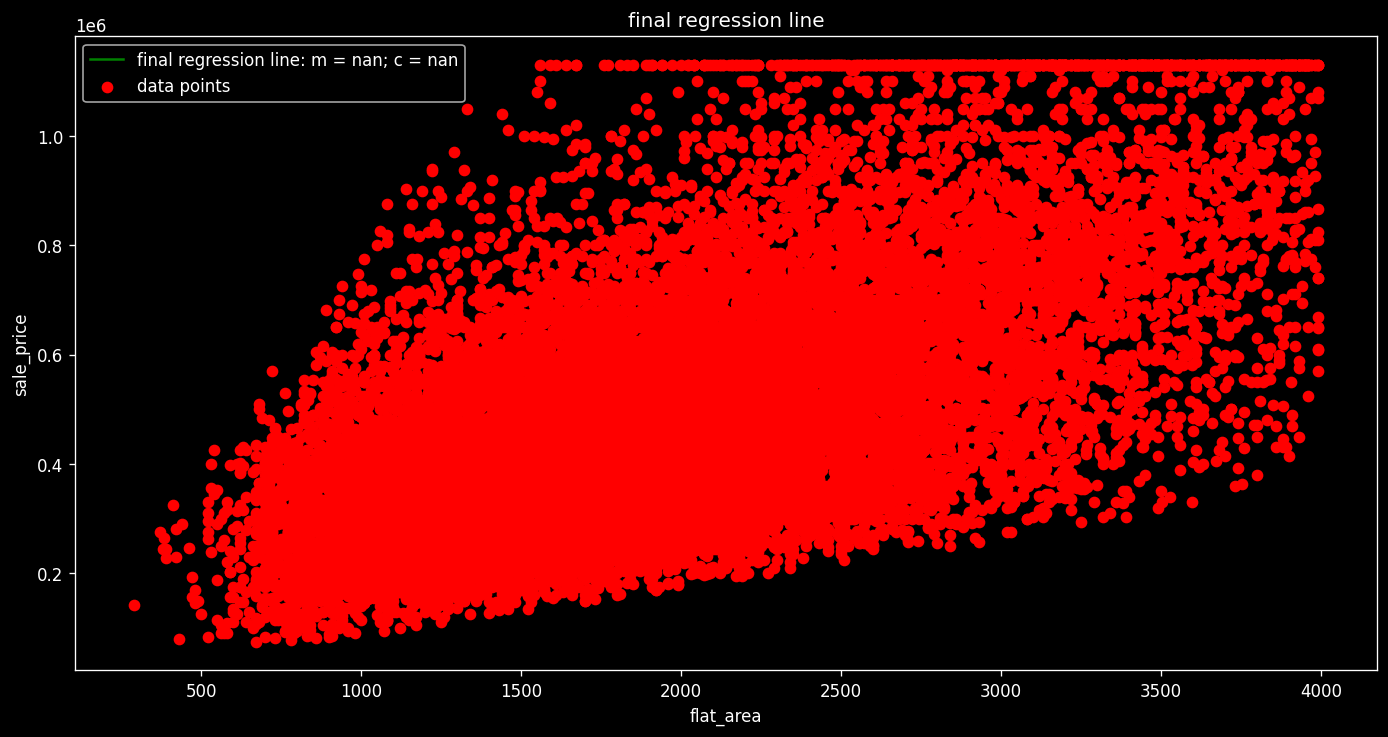

In [107]:
## defining and reshaping the dataset
sale_price = sample_data['sale_price'].values.reshape(-1,1)
flat_area = sample_data['flat_area'].values.reshape(-1,1)

## declaring parameters
max_iter = 1000
cost_old = 0
alpha = 0.01

## Step 1: inititialising the values of m, c
m , c = param_init(sale_price)

# gradient descent in action
for i in range(0,max_iter):
  # step - 2 generating predictions
  predictions = generate_predictions(m , c , flat_area)
  # step - 3 calculating cost
  cost_new = compute_cost(predictions , sale_price)
  # step  Checking if cost converge
  if abs(cost_old - cost_new) < 10**(-7):
    break
  # step Calculating gradients
  Gm , Gc = gradients(predictions,sale_price,flat_area)
  # step - 4 updating values of m and c
  m , c = para_update(m , c , Gm , Gc , alpha)
  ## display result after 20 iterations
  if i%20 == 0:
    print('After Iteration', i,': m =', m, '; c =', c,'; Cost =', cost_new)
  #  updating cost
  cost_old = cost_new

# final result
result(m , c , flat_area , sale_price , cost_new , predictions , i) 

this problem arises when we do not scale our data due to large value of data cost simply explodes

After Iteration 0 : m = 0.11077063102452989 ; c = 5.4443430139992885e-17 ; Cost = 0.8822936897547013
After Iteration 20 : m = 0.2861941537188583 ; c = 4.903731220232058e-17 ; Cost = 0.721537809694341
After Iteration 40 : m = 0.4033082959029528 ; c = 4.359023882572649e-17 ; Cost = 0.6498888490139476
After Iteration 60 : m = 0.48149463083031385 ; c = 3.938548042975913e-17 ; Cost = 0.6179548782960306
After Iteration 80 : m = 0.533692451310134 ; c = 3.550836554516585e-17 ; Cost = 0.6037218946472971
After Iteration 100 : m = 0.5685401323707032 ; c = 3.184285376166834e-17 ; Cost = 0.5973782480856292
After Iteration 120 : m = 0.5918047220439183 ; c = 2.777461349544018e-17 ; Cost = 0.5945508822505718
After Iteration 140 : m = 0.6073363475693679 ; c = 2.7750722822735822e-17 ; Cost = 0.5932907241557697
After Iteration 160 : m = 0.6177053845844729 ; c = 2.7511816095692224e-17 ; Cost = 0.5927290711838742
After Iteration 180 : m = 0.6246278363551804 ; c = 2.7576662207318343e-17 ; Cost = 0.592478742

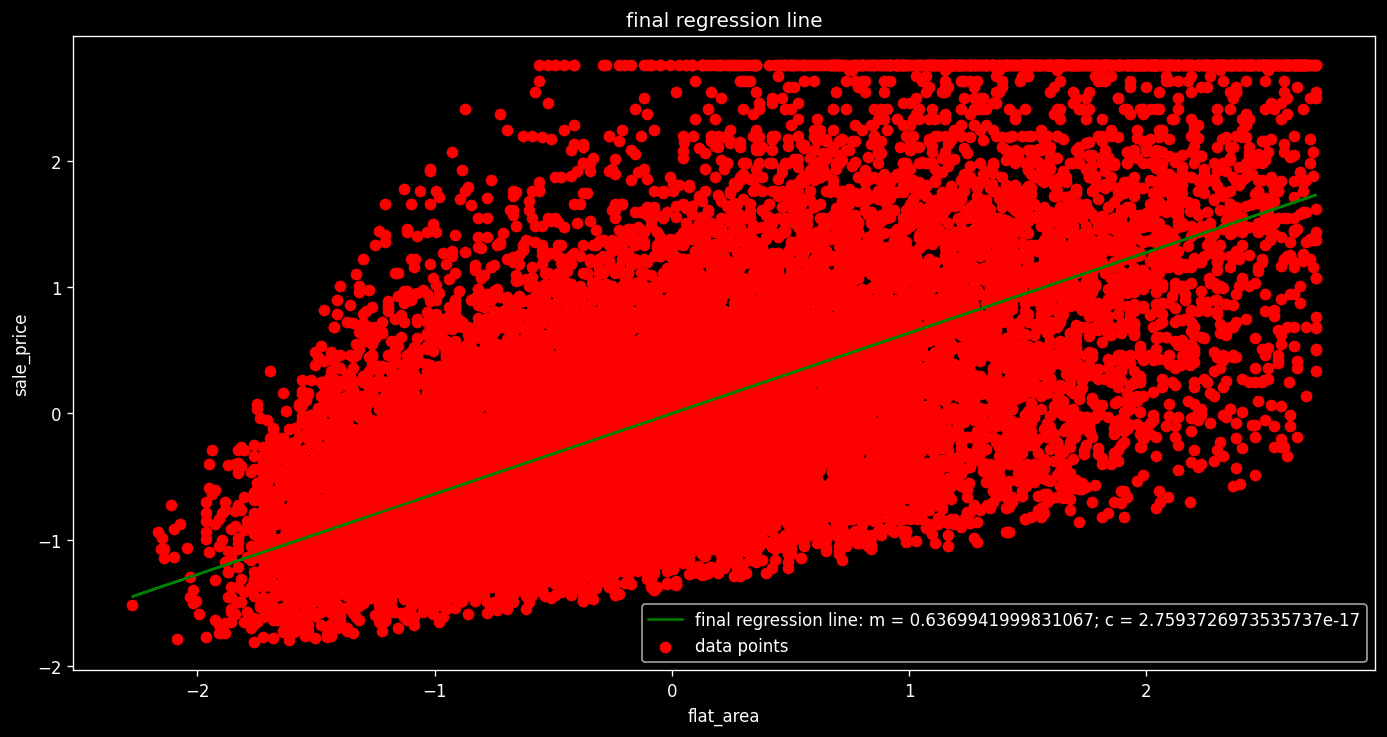

In [108]:
## scaling the dataset using the standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## defining and reshaping the dataset
sale_price = scaler.fit_transform(sample_data['sale_price'].values.reshape(-1,1))
flat_area = scaler.fit_transform(sample_data['flat_area'].values.reshape(-1,1))

## declaring parameters
max_iter = 1000
cost_old = 0
alpha = 0.01

## Step 1: inititialising the values of m, c
m , c = param_init(sale_price)

# gradient descent in action
for i in range(0,max_iter):
  # step - 2 generating predictions
  predictions = generate_predictions(m , c , flat_area)
  # step - 3 calculating cost
  cost_new = compute_cost(predictions , sale_price)
  # step  Checking if cost converge
  if abs(cost_old - cost_new) < 10**(-7):
    break
  # step Calculating gradients
  Gm , Gc = gradients(predictions,sale_price,flat_area)
  # step - 4 updating values of m and c
  m , c = para_update(m , c , Gm , Gc , alpha)
  ## display result after 20 iterations
  if i%20 == 0:
    print('After Iteration', i,': m =', m, '; c =', c,'; Cost =', cost_new)
  #  updating cost
  cost_old = cost_new

# final result
result(m , c , flat_area , sale_price , cost_new , predictions , i) 